In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import re
from tqdm.notebook import tqdm

import tensorflow as tf
from tensorflow import keras
from keras.models import load_model
from sklearn.metrics import f1_score
from keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.model_selection import train_test_split
from keras.models import load_model

In [3]:
path = "C:/Users/ekgus/Desktop/카드소비/"

In [4]:
os.listdir(path)

['.ipynb_checkpoints',
 'august.csv',
 'DownloadData_20230304121208.zip',
 'EX_F_BBP23_00019.csv',
 'httpswww.bigdata-finance.krdatasetd.txt',
 'july.csv',
 'june.csv',
 'Untitled.ipynb']

In [5]:
june = pd.read_csv("june.csv",encoding = 'cp949',low_memory =False)

In [6]:
july = pd.read_csv("july.csv", encoding = 'cp949', low_memory =False)

In [7]:
august = pd.read_csv("august.csv", encoding = 'cp949', low_memory = False)

In [8]:
df = pd.concat([june, july,august], ignore_index=True)
print(df)

          strd_date  strd_tizn_val ctpr_nm ccg_nm adn_dgnm   adng_no cardc_nm  \
0          20220601              0   부산광역시     중구      대청동  21010530       코나   
1          20220601              0   부산광역시     중구      중앙동  21010510       부산   
2          20220601              0   부산광역시     중구      중앙동  21010510       부산   
3          20220601              0   부산광역시     중구      중앙동  21010510       부산   
4          20220601              0   부산광역시     중구      중앙동  21010510       코나   
...             ...            ...     ...    ...      ...       ...      ...   
27135155   20220801              0   부산광역시    영도구     동삼1동  21040650       코나   
27135156   20220801              0   부산광역시    영도구     동삼1동  21040650       코나   
27135157   20220801              0   부산광역시    영도구     동삼1동  21040650       코나   
27135158   20220801              0   부산광역시    영도구     동삼1동  21040650       하나   
27135159   20220801              0   부산광역시    영도구     동삼1동  21040650       하나   

          tpbuz_cd tpbuz_nm

In [18]:
print(df.isnull().sum())

strd_date        0
strd_tizn_val    0
ctpr_nm          0
ccg_nm           0
adn_dgnm         0
adng_no          0
cardc_nm         0
tpbuz_cd         0
tpbuz_nm         0
bth_yr           0
sex_cd           0
trns_cnt         0
ttl_trns_amt     0
dtype: int64


In [19]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27135160 entries, 0 to 27135159
Data columns (total 13 columns):
 #   Column         Dtype 
---  ------         ----- 
 0   strd_date      int64 
 1   strd_tizn_val  int64 
 2   ctpr_nm        object
 3   ccg_nm         object
 4   adn_dgnm       object
 5   adng_no        int64 
 6   cardc_nm       object
 7   tpbuz_cd       int64 
 8   tpbuz_nm       object
 9   bth_yr         int64 
 10  sex_cd         object
 11  trns_cnt       int64 
 12  ttl_trns_amt   int64 
dtypes: int64(7), object(6)
memory usage: 2.6+ GB
None


In [20]:
df.head()

strd_date  strd_tizn_val ctpr_nm ccg_nm adn_dgnm   adng_no cardc_nm  \
0   20220601              0   부산광역시     중구      대청동  21010530       코나   
1   20220601              0   부산광역시     중구      중앙동  21010510       부산   
2   20220601              0   부산광역시     중구      중앙동  21010510       부산   
3   20220601              0   부산광역시     중구      중앙동  21010510       부산   
4   20220601              0   부산광역시     중구      중앙동  21010510       코나   

   tpbuz_cd tpbuz_nm  bth_yr sex_cd  trns_cnt  ttl_trns_amt  
0      4010    편 의 점    1973      M         1          7350  
1      4010    편 의 점    1981      F         1          3700  
2      4010    편 의 점    1992      M         1          7500  
3      4010    편 의 점    1995      M         1          2700  
4      4010    편 의 점    1976      M         1         13900

In [21]:
df.describe()

strd_date  strd_tizn_val       adng_no      tpbuz_cd        bth_yr  \
count  2.713516e+07   2.713516e+07  2.713516e+07  2.713516e+07  2.713516e+07   
mean   2.022070e+07   1.466897e+01  2.110182e+07  6.238941e+03  1.977280e+03   
std    7.979648e+01   4.456955e+00  8.615880e+04  2.131983e+03  1.484848e+01   
min    2.022060e+07   0.000000e+00  2.101051e+07  1.001000e+03  1.921000e+03   
25%    2.022062e+07   1.200000e+01  2.106055e+07  4.020000e+03  1.967000e+03   
50%    2.022071e+07   1.500000e+01  2.109064e+07  7.050000e+03  1.978000e+03   
75%    2.022080e+07   1.800000e+01  2.112059e+07  8.006000e+03  1.989000e+03   
max    2.022083e+07   2.300000e+01  2.151033e+07  9.998000e+03  4.607000e+03   

           trns_cnt  ttl_trns_amt  
count  2.713516e+07  2.713516e+07  
mean   1.102882e+00  2.237177e+04  
std    3.846163e-01  4.577845e+04  
min    1.000000e+00  1.000000e+00  
25%    1.000000e+00  4.400000e+03  
50%    1.000000e+00  9.000000e+03  
75%    1.000000e+00  2.200000e+04  
max    7.100000e+01  2.413460e+06

In [22]:
pd.set_option('display.float_format', '{:.2f}'.format)
df.describe()

strd_date  strd_tizn_val     adng_no    tpbuz_cd      bth_yr  \
count 27135160.00    27135160.00 27135160.00 27135160.00 27135160.00   
mean  20220704.85          14.67 21101816.97     6238.94     1977.28   
std         79.80           4.46    86158.80     2131.98       14.85   
min   20220601.00           0.00 21010510.00     1001.00     1921.00   
25%   20220620.00          12.00 21060550.00     4020.00     1967.00   
50%   20220711.00          15.00 21090640.00     7050.00     1978.00   
75%   20220802.00          18.00 21120590.00     8006.00     1989.00   
max   20220831.00          23.00 21510330.00     9998.00     4607.00   

         trns_cnt  ttl_trns_amt  
count 27135160.00   27135160.00  
mean         1.10      22371.77  
std          0.38      45778.45  
min          1.00          1.00  
25%          1.00       4400.00  
50%          1.00       9000.00  
75%          1.00      22000.00  
max         71.00    2413460.00

<AxesSubplot:>

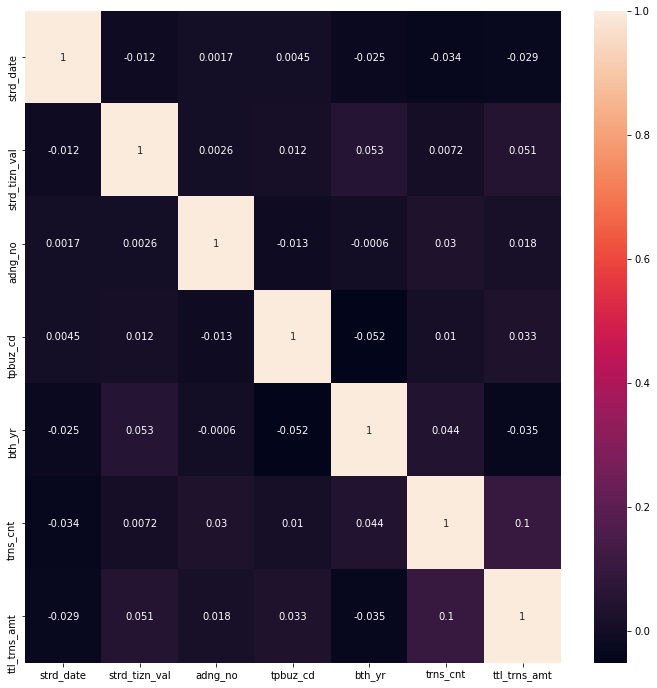

In [23]:
plt.figure(figsize = (12, 12))
sns.heatmap(df.corr(), annot = True)

strd_date:기준일자 strd_tizn_val:기준 시간대값 ctpr_nm:시도명 ccg_nm: 시군구명 adn_dgnm:행정동명
adng_no:행정동번호 cardc_nm:카드사명 tpbuz_cd:업종코드 tpbuz_nm:업종명 bth_yr:출생년도 sex_cd:성별코드 trns_cnt:거래건수 ttl_trnas_amt: 총거래금액

strd_date 기준일자

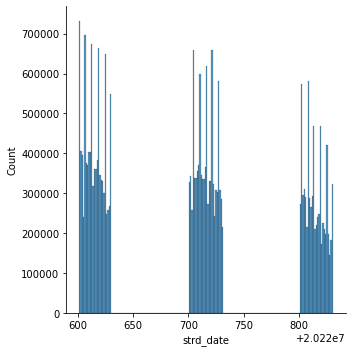

In [24]:
sns.displot(data=df,x='strd_date')
plt.show()

In [26]:
df['strd_date'].value_counts()

20220603    405347
20220611    402782
20220610    402468
20220604    394645
20220617    382423
             ...  
20220829    182203
20220821    173513
20220830    166013
20220831    157670
20220828    144124
Name: strd_date, Length: 92, dtype: int64

In [27]:
df.strd_date.unique()

array([20220601, 20220602, 20220603, 20220604, 20220605, 20220606,
       20220607, 20220608, 20220609, 20220610, 20220611, 20220612,
       20220613, 20220614, 20220615, 20220616, 20220617, 20220618,
       20220619, 20220620, 20220621, 20220622, 20220623, 20220624,
       20220625, 20220626, 20220627, 20220628, 20220629, 20220630,
       20220701, 20220702, 20220703, 20220704, 20220705, 20220706,
       20220707, 20220708, 20220709, 20220710, 20220711, 20220712,
       20220713, 20220714, 20220715, 20220716, 20220717, 20220718,
       20220719, 20220720, 20220721, 20220722, 20220723, 20220724,
       20220725, 20220726, 20220727, 20220728, 20220729, 20220730,
       20220731, 20220801, 20220802, 20220803, 20220804, 20220805,
       20220806, 20220807, 20220808, 20220809, 20220810, 20220811,
       20220812, 20220813, 20220814, 20220815, 20220816, 20220817,
       20220818, 20220819, 20220820, 20220821, 20220822, 20220823,
       20220824, 20220825, 20220826, 20220827, 20220828, 20220

In [29]:
sliced = df['strd_date'].astype(str).str[:6]

print(sliced)

0           202206
1           202206
2           202206
3           202206
4           202206
             ...  
27135155    202208
27135156    202208
27135157    202208
27135158    202208
27135159    202208
Name: strd_date, Length: 27135160, dtype: object


In [30]:
dataslice = sliced.value_counts() #6월이 가장 많다
dataslice

202206    10061735
202207     9756266
202208     7317159
Name: strd_date, dtype: int64

strd_tizn_val 기준시간대값

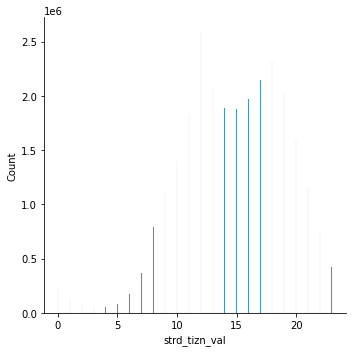

In [31]:
sns.displot(data=df,x='strd_tizn_val')
plt.show()

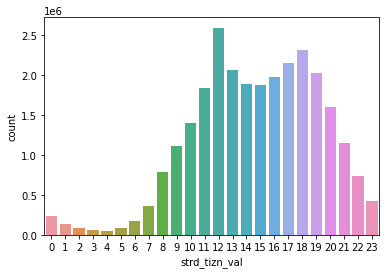

In [32]:
sns.countplot(data=df, x="strd_tizn_val")
plt.show()

12    2594249
18    2317544
17    2149852
13    2064385
19    2022080
16    1973444
14    1884563
15    1879940
11    1835542
20    1602146
10    1396157
21    1145898
9     1115819
8      790217
22     732863
23     423246
7      365718
0      236182
6      176698
1      141841
2       89931
5       84899
3       59274
4       52672
Name: strd_tizn_val, dtype: int64


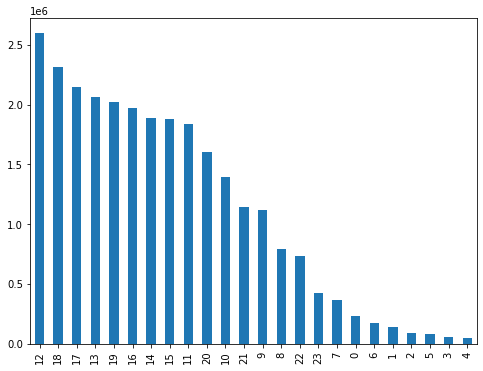

In [33]:
df.strd_tizn_val.value_counts().plot.bar(figsize=(8,6))
print(df.strd_tizn_val.value_counts())

strd_tizn_val
0     15800.087526
1     15308.093027
2     13455.856090
3     12611.465111
4     12234.273485
5     15096.609548
6     16306.926790
7     13849.935445
8     11390.901360
9     17231.339180
10    21452.521412
11    21741.541073
12    20856.304286
13    22486.684580
14    24141.432231
15    24454.010368
16    24028.615220
17    23696.527795
18    24084.356738
19    26627.304459
20    26829.504198
21    23226.247215
22    19304.115408
23    17664.317073
Name: ttl_trns_amt, dtype: float64

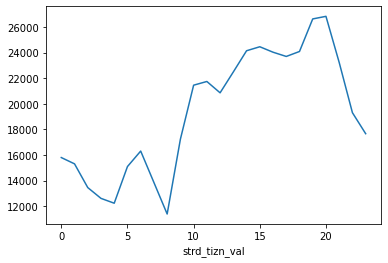

In [13]:
df.groupby(['strd_tizn_val'])['ttl_trns_amt'].mean().plot()
df.groupby(['strd_tizn_val'])['ttl_trns_amt'].mean()

ctpr_nm 시도명

In [37]:
df.ctpr_nm.unique()

array(['부산광역시'], dtype=object)

In [ ]:
df.drop(df[df['ctpr_nm']].index ,inplace=True, axis = 0)

In [ ]:
df.head()

ccg_nm 시군구명

In [38]:
df.ccg_nm.unique()

array(['중구', '서구', '동구', '영도구', '부산진구', '동래구', '남구', '북구', '해운대구', '사하구',
       '금정구', '강서구', '연제구', '수영구', '사상구', '기장군'], dtype=object)

In [39]:
df['ccg_nm'].value_counts()

부산진구    3568514
해운대구    3075269
동래구     2504967
금정구     2151442
사하구     2004888
북구      1995622
연제구     1912041
남구      1881526
수영구     1595591
사상구     1489445
강서구     1336118
기장군      963690
동구       726398
서구       691524
중구       655696
영도구      582429
Name: ccg_nm, dtype: int64

In [15]:
df.groupby(['ccg_nm'])['ttl_trns_amt'].mean()

ccg_nm
강서구     26168.159139
금정구     20321.696546
기장군     26240.252183
남구      20809.734704
동구      18813.496191
동래구     23766.311139
부산진구    22537.320744
북구      22295.886548
사상구     22084.731577
사하구     21336.540398
서구      19153.764237
수영구     22494.446084
연제구     21918.368514
영도구     18426.611664
중구      22606.101690
해운대구    23914.713931
Name: ttl_trns_amt, dtype: float64

In [19]:
sorted_numbers = sorted(df.groupby(['ccg_nm'])['ttl_trns_amt'].mean(), reverse=True)
print(sorted_numbers)  

#기장군이 가장 많음

[26240.252182755867, 26168.15913938739, 23914.713931366656, 23766.311139028978, 22606.101690417512, 22537.32074387266, 22494.44608361416, 22295.88654765281, 22084.73157652683, 21918.368514064292, 21336.540397767854, 20809.734704170976, 20321.696546316376, 19153.764236671468, 18813.496190793478, 18426.611664254357]


In [30]:
df.groupby(['ccg_nm'])['bth_yr'].mean()  #지역별 연령대 평균

ccg_nm
강서구     1978.968441
금정구     1978.351977
기장군     1977.315236
남구      1977.950553
동구      1976.916346
동래구     1976.370711
부산진구    1978.376306
북구      1976.639439
사상구     1977.129650
사하구     1976.567228
서구      1976.991370
수영구     1977.071308
연제구     1976.392973
영도구     1975.766924
중구      1977.464973
해운대구    1976.853307
Name: bth_yr, dtype: float64

adn_dgnm 행정동명

In [40]:
df.adn_dgnm.unique()

array(['대청동', '중앙동', '동광동', '서대신3동', '서대신4동', '부민동', '아미동', '초장동', '충무동',
       '남부민1동', '암남동', '남부민2동', '초량1동', '초량2동', '범일1동', '남항동', '영선1동',
       '영선2동', '봉래1동', '청학1동', '청학2동', '동삼1동', '부전2동', '연지동', '초읍동',
       '양정1동', '양정2동', '전포2동', '당감2동', '당감4동', '가야2동', '개금1동', '개금2동',
       '가야1동', '부전1동', '전포1동', '수민동', '복산동', '온천1동', '온천2동', '사직2동',
       '사직3동', '안락1동', '안락2동', '명륜동', '대연3동', '대연4동', '대연5동', '대연6동',
       '용호1동', '용호2동', '용호3동', '용호4동', '용당동', '감만1동', '감만2동', '문현1동',
       '문현2동', '문현3동', '문현4동', '대연1동', '우암동', '구포1동', '구포2동', '구포3동',
       '금곡동', '화명1동', '덕천1동', '덕천2동', '덕천3동', '만덕1동', '만덕2동', '만덕3동',
       '화명2동', '화명3동', '중1동', '중2동', '송정동', '반여2동', '반여3동', '반송2동',
       '재송1동', '재송2동', '좌1동', '좌2동', '좌3동', '좌4동', '반여1동', '반여4동', '반송1동',
       '우1동', '우2동', '우3동', '괴정1동', '괴정2동', '괴정3동', '괴정4동', '당리동', '하단1동',
       '하단2동', '신평1동', '신평2동', '장림1동', '장림2동', '다대1동', '다대2동', '구평동',
       '감천1동', '감천2동', '서2동', '부곡1동', '부곡2동', '부곡3동', '부곡4동', '장전1동',
       '

In [18]:
pd.set_option('display.max_rows', None)
df['adn_dgnm'].value_counts()

명지1동     620513
부전2동     528260
장전2동     509024
대연3동     494648
정관읍      477624
부전1동     426756
화명3동     411921
기장읍      369600
우2동      354819
연산5동     319209
재송1동     318202
명륜동      318120
수민동      306523
좌2동      292994
온천1동     292492
반여1동     290688
좌1동      286815
녹산동      285503
중1동      283965
괘법동      283458
연산9동     275167
하단2동     274671
개금1동     272662
연산4동     271704
덕천2동     263107
화명1동     262214
남천1동     261496
용호1동     260141
명지2동     254599
거제1동     252995
민락동      245969
온천3동     243059
남산동      237761
전포1동     237609
안락2동     235426
다대1동     228378
당감1동     227583
구서1동     221538
사직2동     218804
양정1동     217680
장전1동     215210
당리동      214358
우1동      214066
광안2동     202680
온천2동     199461
부곡3동     196470
구서2동     196228
학장동      195742
대연1동     186933
엄궁동      185296
사직1동     182590
범일2동     180940
범천1동     179379
수영동      178511
만덕2동     174723
연산2동     174322
양정2동     172204
전포2동     170696
안락1동     169750
하단1동     169251
연산1동     166107
광안1동     165612
망미1동    

adng_no 행정동번호

In [32]:
df.adng_no.unique()

array([21010530, 21010510, 21010520, 21020560, 21020570, 21020590,
       21020610, 21020630, 21020640, 21020650, 21020680, 21020690,
       21030510, 21030520, 21030710, 21040530, 21040540, 21040550,
       21040590, 21040630, 21040640, 21040650, 21050520, 21050540,
       21050550, 21050560, 21050570, 21050610, 21050680, 21050700,
       21050720, 21050740, 21050750, 21050810, 21050820, 21050830,
       21060510, 21060520, 21060550, 21060560, 21060590, 21060600,
       21060610, 21060620, 21060650, 21070530, 21070540, 21070550,
       21070560, 21070570, 21070580, 21070590, 21070600, 21070610,
       21070620, 21070630, 21070660, 21070670, 21070680, 21070690,
       21070700, 21070710, 21080510, 21080520, 21080530, 21080540,
       21080550, 21080560, 21080570, 21080580, 21080590, 21080600,
       21080610, 21080620, 21080630, 21090530, 21090540, 21090560,
       21090580, 21090590, 21090620, 21090640, 21090650, 21090660,
       21090670, 21090680, 21090690, 21090700, 21090710, 21090

In [33]:
pd.set_option('display.max_rows', None)
df['adng_no'].value_counts()

21120590    620513
21050520    528260
21110740    509024
21070530    494648
21510130    477624
21050820    426756
21080630    411921
21510110    369600
21090740    354819
21130590    319209
21090640    318202
21060650    318120
21060510    306523
21090670    292994
21060550    292492
21090700    290688
21090660    286815
21120560    285503
21090530    283965
21150570    283458
21130630    275167
21100570    274671
21050740    272662
21130580    271704
21080570    263107
21080550    262214
21140510    261496
21070570    260141
21120600    254599
21130510    252995
21140600    245969
21060570    243059
21110680    237761
21050830    237609
21060620    235426
21100620    228378
21050800    227583
21110690    221538
21060590    218804
21050560    217680
21110610    215210
21100550    214358
21090730    214066
21140570    202680
21060560    199461
21110590    196470
21110700    196228
21150630    195742
21070700    186933
21150640    185296
21060580    182590
21030660    180940
21050770    

In [10]:
df[df['adn_dgnm']!=21120590]

strd_date  strd_tizn_val ctpr_nm ccg_nm adn_dgnm   adng_no cardc_nm  \
0          20220601              0   부산광역시     중구      대청동  21010530       코나   
1          20220601              0   부산광역시     중구      중앙동  21010510       부산   
2          20220601              0   부산광역시     중구      중앙동  21010510       부산   
3          20220601              0   부산광역시     중구      중앙동  21010510       부산   
4          20220601              0   부산광역시     중구      중앙동  21010510       코나   
...             ...            ...     ...    ...      ...       ...      ...   
27135155   20220801              0   부산광역시    영도구     동삼1동  21040650       코나   
27135156   20220801              0   부산광역시    영도구     동삼1동  21040650       코나   
27135157   20220801              0   부산광역시    영도구     동삼1동  21040650       코나   
27135158   20220801              0   부산광역시    영도구     동삼1동  21040650       하나   
27135159   20220801              0   부산광역시    영도구     동삼1동  21040650       하나   

          tpbuz_cd tpbuz_nm  bth_yr sex_cd  trns_cnt  ttl_trns_amt  
0             4010    편 의 점    1973      M         1          7350  
1             4010    편 의 점    1981      F         1          3700  
2             4010    편 의 점    1992      M         1          7500  
3             4010    편 의 점    1995      M         1          2700  
4             4010    편 의 점    1976      M         1         13900  
...            ...      ...     ...    ...       ...           ...  
27135155      4020     슈퍼마켓    1958      M         1         30000  
27135156      8013       주점    1998      M         1         59600  
27135157      8399   기타음료식품    1998      F         1          7500  
27135158      4010    편 의 점    1971      F         2          7600  
27135159      4010    편 의 점    2001      M         1          2200  

[27135160 rows x 13 columns]

0    대청동
1    중앙동
2    중앙동
3    중앙동
4    중앙동
dtype: object

cardc_nm 카드사명

In [44]:
df.cardc_nm.unique()

array(['코나', '부산', '하나', '동백택시', '농협', 'QR'], dtype=object)

In [45]:
df['cardc_nm'].value_counts()

코나      14474787
하나       6781004
부산       5358627
농협        346273
동백택시      144603
QR         29866
Name: cardc_nm, dtype: int64

In [55]:
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Malgun Gothic'

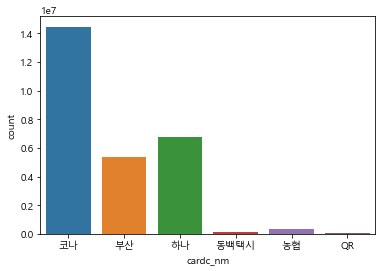

In [56]:
sns.countplot(data=df, x="cardc_nm")
plt.show()

tpbuz_cd 업종코드

In [47]:
df.tpbuz_cd.unique()

array([4010, 9130, 2102, 8001, 4020, 1123, 4021, 8310, 8320, 8021, 8399,
       2114, 8006, 2130, 8013, 2199, 8004, 2240, 3402, 6140, 8301, 8010,
       3305, 8005, 3306, 9305, 9204, 1020, 4499, 3309, 2121, 3307, 5191,
       2111, 5299, 4201, 9210, 3301, 2002, 9101, 5104, 3311, 7120, 5201,
       5101, 2112, 9301, 9398, 5010, 3001, 5199, 6130, 3308, 9901, 3102,
       3313, 9699, 5105, 2001, 8002, 8302, 4099, 2120, 4050, 4302, 7020,
       2113, 9602, 1003, 9006, 3202, 7041, 8499, 9121, 9001, 5001, 7050,
       5102, 2250, 4208, 7121, 3201, 2230, 4412, 5210, 7022, 9998, 7021,
       7112, 3302, 7010, 7103, 7099, 6120, 6102, 5030, 7015, 6110, 4401,
       6101, 1002, 7001, 4004, 4110, 7044, 9099, 3101, 7110, 9003, 7105,
       7102, 7014, 4205, 4399, 4421, 9004, 4080, 4430, 4111, 7101, 8401,
       8402, 9010, 7040, 5002, 6004, 2299, 4303, 7042, 7199, 2251, 3199,
       5202, 4411, 2010, 5040, 3399, 4299, 7111, 4301, 2020, 4410, 1110,
       5050, 1122, 2210, 8031, 5192, 2202, 9203, 42

tpbuz_nm 업종명

In [48]:
df.tpbuz_nm.unique()

array(['편 의 점', '사무서비스', '골프연습장', '일반한식', '슈퍼마켓', '택시', '연 쇄 점', '농축수산품',
       '미곡상', '스넥', '기타음료식품', '헬스클럽', '서양음식', '노 래 방', '주점', '기타레져업소',
       '일식회집', '애완동물', 'DP&E', '주차장', '제과점', '칵테일바', 'SK주유소', '중국식',
       'SK가스충전소', '학원', '사무통신기기수리', '기타숙박업', '기타잡화', '쌍용S-OIL', '당 구 장',
       'GS주유소', '독서실', '볼 링 장', '기타 사무용품', '정장(남성)', '세탁소', '주유소',
       '스포츠레져용품', '종합용역', '예체능계학원', 'GS 가스충전소', '사우나', '컴퓨터', '외국어학원',
       '테니스장', '레져업소', '기타4', '출판 및 인쇄물', '일반가구', '기타 교육기관', '세차장',
       '현대정유(오일뱅크)', '기계공구', '냉열기기', '쌍용S-OIL 가스충전소', '기타농업관련', '보습학원',
       '골프용품 전문점', '갈비전문점', '정육점', '기타유통업', '종합레져타운', '농축수산 가공품',
       '카페트.커튼.천막.지물', '의원', '수 영 장', '비료.사료.종자', '2급 호텔', '목재석재철물',
       '주방용식기', '약국', '기타건강식품', '화물운송', '보일러펌프샷시', '일반서적', '동물병원', '기능학원',
       '영화관', '스포츠 의류', '안마/스포츠마사지', '주방용구', '화원', '액세서리', '통신기기', '치과의원',
       '기타 전문점', '한의원', '의료용품', 'LPG 취급점', '병원(응급실 운영)', '피부미용실',
       '기타의료기관 및 기타의료기기', '카인테리어', '자동차부품', '문구용품', '치과병원', '자동차정비', '가방',
       '자

In [49]:
pd.set_option('display.max_rows', None)
df['tpbuz_nm'].value_counts()

편 의 점              4271463
서양음식               4047389
일반한식               3667224
슈퍼마켓               3266127
약국                 1293606
스넥                 1159188
기타음료식품              985265
제과점                 886916
의원                  871593
농축수산품               692911
택시                  543154
정육점                 456591
중국식                 365046
기타레져업소              338729
미용원                 300111
일식회집                222209
주유소                 209276
GS주유소               208836
SK주유소               208078
한의원                 173567
병원(응급실 운영)          155453
기타잡화                143941
치과의원                143147
현대정유(오일뱅크)          135180
주점                  122676
쌍용S-OIL             113908
문구용품                 97966
주차장                  92008
세탁소                  89029
사우나                  87708
보습학원                 81794
정장(남성)               78217
예체능계학원               74668
농.축협 직영매장            73345
대형할인점                70860
사무서비스                68268
안경                   60544
헬

In [35]:
df[(df['tpbuz_nm']==df['tpbuz_nm'])&(df['tpbuz_cd']!=df['tpbuz_cd'])].sum()

strd_date        0.0
strd_tizn_val    0.0
ctpr_nm          0.0
ccg_nm           0.0
adn_dgnm         0.0
adng_no          0.0
cardc_nm         0.0
tpbuz_cd         0.0
tpbuz_nm         0.0
bth_yr           0.0
sex_cd           0.0
trns_cnt         0.0
ttl_trns_amt     0.0
dtype: float64

bth_yr 출생년도

In [50]:
df.bth_yr.unique()

array([1973, 1981, 1992, 1995, 1976, 1985, 1989, 1996, 1999, 1977, 1974,
       1972, 1990, 1994, 1998, 1964, 1970, 1983, 2001, 1997, 2000, 1980,
       1971, 1987, 1967, 1975, 1944, 1957, 1969, 1965, 1956, 1968, 1993,
       1991, 1979, 1963, 1982, 1961, 1988, 1978, 1966, 2003, 1962, 1986,
       2002, 1984, 2004, 1960, 1955, 1959, 2005, 2006, 1952, 1953, 1958,
       1947, 1951, 1949, 1954, 2007, 1948, 1942, 1946, 1933, 2008, 1950,
       1945, 1932, 1938, 1941, 1940, 1943, 1936, 1934, 1939, 1935, 1937,
       3688, 1929, 1931, 1925, 1930, 1928, 1923, 4607, 1921, 1924, 1927,
       1926], dtype=int64)

In [51]:
sorted_numbers = sorted(df.bth_yr.unique(), reverse=True)
print(sorted_numbers)  
#4067,3688 ?

[4607, 3688, 2008, 2007, 2006, 2005, 2004, 2003, 2002, 2001, 2000, 1999, 1998, 1997, 1996, 1995, 1994, 1993, 1992, 1991, 1990, 1989, 1988, 1987, 1986, 1985, 1984, 1983, 1982, 1981, 1980, 1979, 1978, 1977, 1976, 1975, 1974, 1973, 1972, 1971, 1970, 1969, 1968, 1967, 1966, 1965, 1964, 1963, 1962, 1961, 1960, 1959, 1958, 1957, 1956, 1955, 1954, 1953, 1952, 1951, 1950, 1949, 1948, 1947, 1946, 1945, 1944, 1943, 1942, 1941, 1940, 1939, 1938, 1937, 1936, 1935, 1934, 1933, 1932, 1931, 1930, 1929, 1928, 1927, 1926, 1925, 1924, 1923, 1921]


In [52]:
df['bth_yr'].value_counts()
#4607 : 44, 3688: 97 ->제거?

1981    731958
1980    728531
1979    712602
1982    705880
1971    652587
1974    650671
1973    649521
1972    639901
1983    638864
1977    618454
1975    614710
1992    612343
1970    606192
1969    602190
1991    598393
1978    594313
1968    587929
1976    586019
1984    580534
1993    575647
1985    559107
1989    556998
1988    550939
1967    548699
1994    546435
1986    538858
1987    535893
1990    535126
1995    520463
1996    512412
1965    505738
1961    486677
1962    484802
1966    476145
1960    473554
1997    472039
1964    463808
1963    442268
1998    441058
1959    419026
1999    404278
1958    370247
2000    368031
1957    356049
1956    323240
1955    313853
1954    239851
2001    220933
1953    198099
1952    196280
2002    166168
2003    152240
1951    141513
1950    125134
1949    113712
1948    100488
1947     87240
2004     81686
1946     60674
2005     56150
1944     44013
1945     43454
2006     42300
1943     33380
1942     28810
2007     26847
1941     2

In [53]:
df[df['bth_yr']==4607]

strd_date  strd_tizn_val ctpr_nm ccg_nm adn_dgnm   adng_no cardc_nm  \
420492     20220602             11   부산광역시   부산진구     부전2동  21050520       하나   
832378     20220603             12   부산광역시    동래구     안락2동  21060620       코나   
832520     20220603             12   부산광역시    동래구     안락2동  21060620       하나   
1102600    20220603             21   부산광역시    동래구      명륜동  21060650       하나   
1130948    20220603             23   부산광역시    동래구     사직3동  21060600       하나   
1601709    20220605             12   부산광역시    사상구      괘법동  21150570       하나   
1699304    20220605             18   부산광역시   부산진구     당감4동  21050700       하나   
1936386    20220606             15   부산광역시   해운대구     반여1동  21090700       하나   
2423254    20220607             20   부산광역시   부산진구     부전2동  21050520       하나   
2509403    20220608              9   부산광역시    사상구     덕포2동  21150560       하나   
2938711    20220609             12   부산광역시    동래구      수민동  21060510       하나   
3164727    20220609             20   부산광역시   부산진구     부전2동  21050520       하나   
3505765    20220610             18   부산광역시   해운대구     반여4동  21090710       하나   
3870178    20220611             16   부산광역시    사상구     주례1동  21150600       하나   
4025254    20220612              0   부산광역시    사상구      감전동  21150650       하나   
4350866    20220613              8   부산광역시   부산진구     부전2동  21050520       하나   
4391497    20220613             10   부산광역시    수영구      민락동  21140600       하나   
4449839    20220613             12   부산광역시    수영구     광안3동  21140580       하나   
5459440    20220616             12   부산광역시   부산진구     부전2동  21050520       하나   
6689937    20220619             18   부산광역시     동구     초량3동  21030530       하나   
6733018    20220619             19   부산광역시    사상구     주례1동  21150600       하나   
8959873    20220626             20   부산광역시   해운대구     반여1동  21090700       하나   
9260796    20220628              8   부산광역시   해운대구     반여4동  21090710       하나   
10134401   20220701             12   부산광역시   부산진구     부전2동  21050520       하나   
10380214   20220701             22   부산광역시    금정구      남산동  21110680       하나   
11048636   20220704             11   부산광역시   부산진구     부전2동  21050520       코나   
11586960   20220705             19   부산광역시    동래구     명장2동  21060640       코나   
11710092   20220706             11   부산광역시   부산진구     부전2동  21050520       코나   
12301369   20220707             21   부산광역시   부산진구     부전2동  21050520       코나   
12585852   20220708             18   부산광역시   해운대구     반여4동  21090710       하나   
12995526   20220709             19   부산광역시    사상구      감전동  21150650       하나   
13435978   20220711             12   부산광역시    연제구     연산5동  21130590       하나   
13592531   20220711             19   부산광역시    동래구     사직3동  21060600       하나   
13775147   20220712             13   부산광역시    동래구     안락2동  21060620       하나   
14364024   20220714              9   부산광역시   부산진구     부전2동  21050520       하나   
17871084   20220725             11   부산광역시   부산진구     부전2동  21050520       코나   
20602416   20220803             19   부산광역시   부산진구     부전2동  21050520       하나   
20640764   20220803             21   부산광역시   부산진구     부전2동  21050520       하나   
20732926   20220804             11   부산광역시    사상구     주례2동  21150610       코나   
20732981   20220804             11   부산광역시    사상구     주례2동  21150610       하나   
20896609   20220804             19   부산광역시     동구     범일2동  21030660       하나   
21012565   20220805             11   부산광역시   부산진구     부전2동  21050520       하나   
21107265   20220805             15   부산광역시   부산진구     부전2동  21050520       하나   
21555671   20220806             23   부산광역시    동래구     온천3동  21060570       하나   

          tpbuz_cd    tpbuz_nm  bth_yr sex_cd  trns_cnt  ttl_trns_amt  
420492        8001        일반한식    4607      M         1         14500  
832378        3309     쌍용S-OIL    4607      M         1          4000  
832520        3309     쌍용S-OIL    4607      M         1         47000  
1102600       4499        기타잡화    4607      M         1          1300  
1130

In [54]:
df[df['bth_yr']==3688]

strd_date  strd_tizn_val ctpr_nm ccg_nm adn_dgnm   adng_no cardc_nm  \
68381      20220601             11   부산광역시   해운대구      우2동  21090740       하나   
144065     20220601             14   부산광역시     중구      보수동  21010540       하나   
169975     20220601             14   부산광역시    수영구     망미2동  21140550       코나   
198852     20220601             15   부산광역시    수영구      민락동  21140600       코나   
298256     20220601             19   부산광역시   해운대구      우2동  21090740       하나   
841915     20220603             12   부산광역시   해운대구      우2동  21090740       하나   
1160536    20220604              8   부산광역시   해운대구      우2동  21090740       하나   
1556713    20220605              9   부산광역시   해운대구      우2동  21090740       하나   
1634991    20220605             14   부산광역시   해운대구      우2동  21090740       하나   
2018060    20220606             18   부산광역시    수영구     망미2동  21140550       코나   
2033290    20220606             19   부산광역시   해운대구      송정동  21090560       코나   
2057357    20220606             20   부산광역시   해운대구      우2동  21090740       코나   
3412418    20220610             15   부산광역시   해운대구      우2동  21090740       하나   
3441336    20220610             16   부산광역시   해운대구      우2동  21090740       하나   
3676536    20220611             10   부산광역시   해운대구      우2동  21090740       하나   
3805484    20220611             14   부산광역시   해운대구      우2동  21090740       코나   
3842245    20220611             15   부산광역시    수영구     망미2동  21140550       코나   
4956930    20220614             19   부산광역시   해운대구      우2동  21090740       하나   
4956986    20220614             19   부산광역시   해운대구      우2동  21090740       하나   
5256513    20220615             17   부산광역시    수영구     남천1동  21140510       코나   
5304728    20220615             19   부산광역시   해운대구      중1동  21090530       코나   
6198202    20220618             11   부산광역시   해운대구      우2동  21090740       코나   
6420219    20220618             19   부산광역시   해운대구      중2동  21090540       코나   
6518896    20220619              9   부산광역시     남구     대연3동  21070530       하나   
6562896    20220619             12   부산광역시     남구     대연3동  21070530       하나   
6632281    20220619             15   부산광역시     남구     대연3동  21070530       하나   
7086865    20220620             20   부산광역시   해운대구      우1동  21090730       하나   
7121390    20220620             23   부산광역시   해운대구      우1동  21090730       하나   
7417712    20220621             20   부산광역시   해운대구      송정동  21090560       코나   
7436198    20220621             21   부산광역시   해운대구      우2동  21090740       코나   
7482833    20220622              8   부산광역시    사상구      괘법동  21150570       하나   
8010083    20220623             18   부산광역시   해운대구      송정동  21090560       코나   
8241521    20220624             15   부산광역시    수영구     망미2동  21140550       코나   
8379995    20220624             21   부산광역시   해운대구      중1동  21090530       코나   
8567239    20220625             14   부산광역시   해운대구      우2동  21090740       하나   
8583240    20220625             15   부산광역시   부산진구     전포1동  21050830       하나   
8680010    20220625             19   부산광역시   해운대구      중1동  21090530       코나   
8680123    20220625             19   부산광역시   해운대구      중1동  21090530       하나   
9058984    20220627             12   부산광역시   해운대구      우2동  21090740       하나   
9058994    20220627             12   부산광역시   해운대구      우2동  21090740       하나   
9346309    20220628             13   부산광역시   해운대구      우2동  21090740       하나   
9365286    20220628             14   부산광역시   해운대구      우2동  21090740       하나   
9468465    20220628             19   부산광역시   해운대구      송정동  21090560       하나   
9550357    20220629             10   부산광역시   해운대구      우2동  21090740       하나   
9550364    20220629             10   부산광역시   해운대구      우2동  21090740       하나   
9729378    20220629             19   부산광역시   해운대구      우2동  21090740       코나   
9947686    20220630             17   부산광역시   부산진구     부전2동  21050520       하나   
9971884    20220630             18   부산광역시   부산진구     부전2동  21050520       하나   
10363725   20220701             21   부산광역

In [70]:
#df.drop(df[df['bth_yr']=='4607'].index ,inplace=True, axis = 0)
#df.drop(df[df['bth_yr']=='3688'].index ,inplace=True, axis = 0)

In [23]:
df.groupby(['bth_yr'])['ttl_trns_amt'].mean()

bth_yr
1921     11018.510638
1923     15085.395683
1924     34360.416667
1925     28350.810811
1926    516666.666667
1927     34512.000000
1928     31540.627119
1929     11597.748918
1930     21109.948276
1931     16722.688172
1932     21447.116994
1933     27793.861646
1934     23684.559953
1935     22426.773732
1936     24751.363855
1937     25668.648784
1938     22447.615999
1939     23814.080213
1940     23120.917020
1941     22314.079636
1942     24451.021173
1943     23589.028790
1944     22758.956377
1945     23159.646477
1946     24320.561905
1947     23292.199484
1948     24021.001831
1949     24049.368624
1950     23641.635766
1951     23844.226241
1952     23809.914500
1953     23734.380542
1954     23511.525343
1955     23543.195496
1956     23469.714045
1957     23414.798258
1958     23647.627970
1959     23565.596920
1960     23522.387772
1961     23502.356783
1962     23522.966291
1963     23067.953397
1964     22693.004985
1965     22620.536984
1966     22573.628099
196

In [21]:
df[df['bth_yr']==1926]

strd_date  strd_tizn_val ctpr_nm ccg_nm adn_dgnm   adng_no cardc_nm  \
9371322    20220628             14   부산광역시    수영구      민락동  21140600       코나   
18839249   20220728             13   부산광역시    수영구      민락동  21140600       코나   
26357044   20220827             12   부산광역시    수영구      민락동  21140600       코나   

          tpbuz_cd    tpbuz_nm  bth_yr sex_cd  trns_cnt  ttl_trns_amt  
9371322       7010  병원(응급실 운영)    1926      F         1        650000  
18839249      7010  병원(응급실 운영)    1926      F         2        600000  
26357044      7010  병원(응급실 운영)    1926      F         1        300000

sex_cd 성별코드

In [57]:
df['sex_cd'].value_counts()

F    14912119
M    12223041
Name: sex_cd, dtype: int64

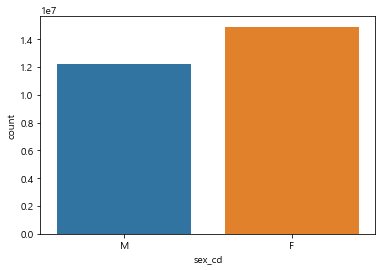

In [58]:
sns.countplot(data=df, x="sex_cd")
plt.show()

In [11]:
df.groupby(['sex_cd'])['ttl_trns_amt'].mean()

sex_cd
F    22919.131814
M    21703.987836
Name: ttl_trns_amt, dtype: float64

<AxesSubplot:xlabel='sex_cd', ylabel='ttl_trns_amt'>

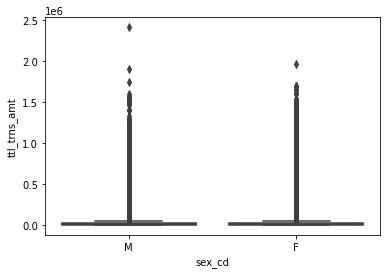

In [10]:
sns.boxplot(x = 'sex_cd', y = 'ttl_trns_amt', data = df)

trns_cnt 거래건수

In [59]:
df.trns_cnt.unique()

array([ 1,  2,  3,  4,  5,  6, 10,  7,  8, 11, 30,  9, 12, 13, 24, 40, 20,
       15, 14, 21, 16, 17, 19, 18, 22, 28, 55, 23, 31, 26, 29, 37, 34, 27,
       56, 71, 57, 35, 36, 38, 41, 64, 25, 32, 63], dtype=int64)

In [60]:
df['trns_cnt'].value_counts()

1     24823825
2      1964625
3       264914
4        55319
5        15612
6         5727
7         2323
8         1119
9          569
10         350
11         227
12         136
13         114
14          64
15          47
16          32
17          28
18          18
20          17
19          15
22          11
24          10
21           8
40           6
23           5
30           5
26           4
28           4
31           4
29           3
41           2
27           2
32           2
38           2
64           1
63           1
57           1
56           1
55           1
35           1
37           1
36           1
25           1
34           1
71           1
Name: trns_cnt, dtype: int64

In [24]:
df[df['trns_cnt']==40]

strd_date  strd_tizn_val ctpr_nm ccg_nm adn_dgnm   adng_no cardc_nm  \
300998     20220601             19   부산광역시    금정구     장전1동  21110610       하나   
10251335   20220701             17   부산광역시     동구     수정2동  21030570       부산   
13203105   20220710             15   부산광역시    사상구     주례2동  21150610       코나   
22931710   20220812              9   부산광역시     서구    동대신1동  21020510       부산   
23067550   20220812             16   부산광역시     동구     수정2동  21030570       부산   
26059010   20220825             21   부산광역시    동래구     온천2동  21060560       농협   

          tpbuz_cd  tpbuz_nm  bth_yr sex_cd  trns_cnt  ttl_trns_amt  
300998        5202  사무용 OA기기    1997      F        40          7000  
10251335      4010     편 의 점    1984      F        40        160800  
13203105      9130     사무서비스    2000      F        40          6720  
22931710      4010     편 의 점    1946      F        40        180000  
23067550      4010     편 의 점    1984      F        40        172500  
26059010      4010     편 의 점    1980      F        40        127000

In [27]:
df[df['trns_cnt']==14]

strd_date  strd_tizn_val ctpr_nm ccg_nm adn_dgnm   adng_no cardc_nm  \
450059     20220602             12   부산광역시   부산진구     가야1동  21050810       코나   
710398     20220602             21   부산광역시    사하구     하단2동  21100570       코나   
833487     20220603             12   부산광역시     남구     대연3동  21070530       코나   
1331975    20220604             14   부산광역시    강서구     명지1동  21120590       코나   
1379456    20220604             16   부산광역시   해운대구      우2동  21090740       코나   
1886676    20220606             13   부산광역시    금정구     장전2동  21110740       코나   
2225754    20220607             13   부산광역시     남구     대연3동  21070530       코나   
2338678    20220607             17   부산광역시     남구     대연3동  21070530       하나   
2351544    20220607             17   부산광역시    금정구     장전2동  21110740       코나   
2352866    20220607             17   부산광역시    강서구     명지1동  21120590       코나   
2352876    20220607             17   부산광역시    강서구     명지1동  21120590       코나   
2386155    20220607             18   부산광역시    강서구     명지1동  21120590       코나   
2414335    20220607             19   부산광역시    강서구     명지1동  21120590       코나   
2419319    20220607             19   부산광역시    사상구      괘법동  21150570       하나   
2435779    20220607             20   부산광역시    강서구     명지1동  21120590       코나   
2451378    20220607             21   부산광역시    강서구     명지1동  21120590       코나   
2451387    20220607             21   부산광역시    강서구     명지1동  21120590       코나   
2565598    20220608             12   부산광역시     남구     대연3동  21070530       코나   
2579211    20220608             12   부산광역시    금정구     장전2동  21110740       코나   
2721825    20220608             17   부산광역시    강서구     명지1동  21120590       코나   
2754908    20220608             18   부산광역시    강서구     명지1동  21120590       코나   
2754909    20220608             18   부산광역시    강서구     명지1동  21120590       코나   
2754912    20220608             18   부산광역시    강서구     명지1동  21120590       코나   
2783978    20220608             19   부산광역시    강서구     명지1동  21120590       코나   
2823989    20220608             21   부산광역시    강서구     명지1동  21120590       코나   
2823991    20220608             21   부산광역시    강서구     명지1동  21120590       코나   
2835974    20220608             22   부산광역시    강서구     명지1동  21120590       코나   
2845259    20220609              0   부산광역시   해운대구      우2동  21090740       코나   
2897169    20220609             10   부산광역시    사하구      당리동  21100550       하나   
2941658    20220609             12   부산광역시     남구     대연3동  21070530       코나   
2975171    20220609             13   부산광역시     남구     대연3동  21070530       코나   
2981163    20220609             13   부산광역시   해운대구      우2동  21090740       하나   
3627098    20220611              2   부산광역시    사상구     모라1동  21150520       코나   
3851497    20220611             16   부산광역시   부산진구     전포1동  21050830       코나   
4144846    20220612             14   부산광역시   부산진구     전포1동  21050830       코나   
4164818    20220612             15   부산광역시     중구      중앙동  21010510       코나   
4170063    20220612             15   부산광역시   부산진구     전포1동  21050830       코나   
4277814    20220612             19   부산광역시   해운대구      우2동  21090740       코나   
4403434    20220613             11   부산광역시     북구     덕천2동  21080570       부산   
4429965    20220613             12   부산광역시     남구     대연3동  21070530       코나   
4437730    20220613             12   부산광역시   해운대구      우2동  21090740       코나   
5118045    20220615             12   부산광역시    금정구     장전2동  21110740       코나   
5349117    20220615             21   부산광역시   해운대구      우2동  21090740       코나   
6284119    20220618             14   부산광역시   부산진구     전포1동  21050830       코나   
6850234    20220620             11   부산광역시    사하구     하단2동  21100570       코나   
7581325    20220622             13   부산광역시    사하구     하단2동  21100570       하나   
9287529    20220628             10   부산광역시    사상구      괘법동  21150570       부산   
9550687    20220629             10   부산광역시    사하구      당리동  21100550       하나   
11236314   20220704             18   부산광역

In [29]:
df[df['trns_cnt']==6]

strd_date  strd_tizn_val ctpr_nm ccg_nm adn_dgnm   adng_no cardc_nm  \
17007      20220601              8   부산광역시   부산진구     부전1동  21050820       코나   
22289      20220601              8   부산광역시    수영구      수영동  21140530       코나   
30625      20220601              9   부산광역시   해운대구      우2동  21090740       코나   
50356      20220601             10   부산광역시    강서구     명지1동  21120590       코나   
53961      20220601             10   부산광역시    사상구      엄궁동  21150640       코나   
54066      20220601             10   부산광역시    사상구      엄궁동  21150640       하나   
67652      20220601             11   부산광역시   해운대구     반여1동  21090700       코나   
73014      20220601             11   부산광역시    강서구     명지1동  21120590       코나   
73251      20220601             11   부산광역시    강서구     명지1동  21120590       코나   
77921      20220601             11   부산광역시    사상구      엄궁동  21150640       코나   
77928      20220601             11   부산광역시    사상구      엄궁동  21150640       코나   
78813      20220601             11   부산광역시    기장군      정관읍  21510130       코나   
85241      20220601             12   부산광역시   부산진구     당감1동  21050800       코나   
96106      20220601             12   부산광역시   해운대구     반여1동  21090700       부산   
100494     20220601             12   부산광역시    금정구     장전1동  21110610       코나   
100499     20220601             12   부산광역시    금정구     장전1동  21110610       코나   
102074     20220601             12   부산광역시    금정구     장전2동  21110740       코나   
102133     20220601             12   부산광역시    금정구     장전2동  21110740       코나   
102141     20220601             12   부산광역시    금정구     장전2동  21110740       코나   
103152     20220601             12   부산광역시    강서구     명지1동  21120590       부산   
103350     20220601             12   부산광역시    강서구     명지1동  21120590       코나   
103519     20220601             12   부산광역시    강서구     명지1동  21120590       코나   
103526     20220601             12   부산광역시    강서구     명지1동  21120590       코나   
103826     20220601             12   부산광역시    강서구     명지1동  21120590       하나   
114926     20220601             13   부산광역시   부산진구     부전2동  21050520       코나   
114945     20220601             13   부산광역시   부산진구     부전2동  21050520       코나   
114947     20220601             13   부산광역시   부산진구     부전2동  21050520       코나   
114949     20220601             13   부산광역시   부산진구     부전2동  21050520       코나   
118521     20220601             13   부산광역시   부산진구     전포1동  21050830       코나   
118524     20220601             13   부산광역시   부산진구     전포1동  21050830       코나   
118598     20220601             13   부산광역시   부산진구     전포1동  21050830       하나   
118894     20220601             13   부산광역시    동래구      수민동  21060510       코나   
121928     20220601             13   부산광역시     남구     대연3동  21070530       코나   
129154     20220601             13   부산광역시   해운대구      우1동  21090730       코나   
131005     20220601             13   부산광역시    사하구     하단2동  21100570       하나   
133042     20220601             13   부산광역시    금정구     장전1동  21110610       코나   
133043     20220601             13   부산광역시    금정구     장전1동  21110610       코나   
134780     20220601             13   부산광역시    금정구     장전2동  21110740       코나   
134782     20220601             13   부산광역시    금정구     장전2동  21110740       코나   
134784     20220601             13   부산광역시    금정구     장전2동  21110740       코나   
134787     20220601             13   부산광역시    금정구     장전2동  21110740       코나   
135006     20220601             13   부산광역시    금정구     장전2동  21110740       하나   
135890     20220601             13   부산광역시    강서구     명지1동  21120590       코나   
136056     20220601             13   부산광역시    강서구     명지1동  21120590       코나   
142762     20220601             13   부산광역시    기장군      기장읍  21510110       코나   
142849     20220601             13   부산광역시    기장군      기장읍  21510110       코나   
143482     20220601             13   부산광역시    기장군      정관읍  21510130       코나   
143493     20220601             13   부산광역시    기장군      정관읍  21510130       코나   
147385     20220601             14   부산광역

ttl_trns_amt 총거래금액

In [67]:
df.ttl_trns_amt.unique()

array([  7350,   3700,   7500, ...,    579,    997, 106662], dtype=int64)